# K-Nearest Neighbour

### Mathematical Formulation

At its heart, the KNN algorithm operates on the principle that data points with similar features tend to belong to the same class (in classification) or have similar target values (in regression). Given a new, unlabelled data point, the algorithm identifies the 'k' closest data points in the training set based on a chosen distance metric. The prediction for the new point is then determined by the majority class (for classification) or the average (or weighted average) of the target values (for regression) of these 'k' nearest neighbours.

Let the training dataset be denoted as $D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)\}$, where $\mathbf{x}_i \in \mathbb{R}^d$ represents the $d$-dimensional feature vector of the $i$-th data point, and $y_i$ is the corresponding label (for classification) or target value (for regression). Consider a new, unlabelled data point $\mathbf{x}_{new}$ for which we want to make a prediction.

#### Distance Metrics

The first crucial step in the KNN algorithm is to define a measure of distance between data points. Several distance metrics can be employed, with the most common being the Minkowski distance. The Minkowski distance between two points $\mathbf{p} = (p_1, p_2, ..., p_d)$ and $\mathbf{q} = (q_1, q_2, ..., q_d)$ in $d$-dimensional space is defined as:

$$D(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^{d} |p_i - q_i|^r \right)^{1/r}$$

By varying the value of $r$, we obtain different distance metrics:

- Euclidean Distance ($r=2$)
    $$
    D_E(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{d} (p_i - q_i)^2}
    $$
- Manhattan Distance ($r=1$)
    $$
    D_M(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{d} |p_i - q_i|
    $$
- Chebyshev Distance ($r=\infty$)
    $$
    D_C(\mathbf{p}, \mathbf{q}) = \max_{i} |p_i - q_i|
    $$
The choice of distance metric can significantly impact the performance of the KNN algorithm and should be considered based on the characteristics of the data.

#### Finding the K-Nearest Neighbours

Once a distance metric is chosen, the algorithm calculates the distance between the new data point $\mathbf{x}_{new}$ and all data points in the training set $D$. It then identifies the $k$ training data points that have the smallest distances to $\mathbf{x}_{new}$. Let these $k$ nearest neighbours be denoted by the set $N_k(\mathbf{x}_{new}) = \{(\mathbf{x}_{(1)}, y_{(1)}), (\mathbf{x}_{(2)}, y_{(2)}), ..., (\mathbf{x}_{(k)}, y_{(k)})\}$, where the subscript $(i)$ indicates the $i$-th nearest neighbour.

### Prediction

#### Classification

In a classification task, the goal is to assign a class label to the new data point $\mathbf{x}_{new}$. The KNN algorithm achieves this by determining the majority class among the $k$ nearest neighbours. Let $C = \{c_1, c_2, ..., c_m\}$ be the set of possible class labels. The predicted class $\hat{y}$ for $\mathbf{x}_{new}$ is given by:

$$\hat{y} = \underset{c \in C}{\operatorname{argmax}} \sum_{i=1}^{k} I(y_{(i)} = c)$$

where $I(y_{(i)} = c)$ is an indicator function that equals 1 if the label of the $i$-th nearest neighbour $y_{(i)}$ is equal to class $c$, and 0 otherwise. In essence, the class that appears most frequently among the $k$ nearest neighbours is assigned to the new data point.

#### Prediction for Regression

In a regression task, the goal is to predict a continuous target value for the new data point $\mathbf{x}_{new}$. The KNN algorithm typically does this by calculating the average of the target values of the $k$ nearest neighbours:

$$\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_{(i)}$$

A variation of this is to use a weighted average, where the weights are inversely proportional to the distance from $\mathbf{x}_{new}$ to each of its $k$ neighbours. This gives more influence to closer neighbours. A common weighting scheme is:

$$w_i = \frac{1}{D(\mathbf{x}_{new}, \mathbf{x}_{(i)}) + \epsilon}$$

where $\epsilon$ is a small positive constant to avoid division by zero if a neighbour is exactly at $\mathbf{x}_{new}$. The predicted value $\hat{y}$ then becomes:

$$\hat{y} = \frac{\sum_{i=1}^{k} w_i y_{(i)}}{\sum_{i=1}^{k} w_i}$$

### Choosing the Value of 'k'

The choice of the parameter $k$ is critical to the performance of the KNN algorithm.

* **Small values of k (e.g., k=1):** This makes the algorithm highly sensitive to noise in the data. A single noisy neighbour can significantly influence the prediction. The decision boundary in classification tends to be more complex and can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data.

* **Large values of k:** This smooths the decision boundary in classification and reduces the impact of noise. However, if $k$ is too large, neighbours from different classes or with significantly different target values might be included in the prediction, potentially leading to underfitting, where the model fails to capture the underlying patterns in the data.

The optimal value of $k$ is often determined through empirical evaluation using techniques like cross-validation. This involves splitting the training data into multiple subsets, training the KNN algorithm with different values of $k$ on some subsets, and evaluating its performance on the remaining subsets. The value of $k$ that yields the best performance on the validation sets is typically chosen.

### Handling Ties

In classification, a tie can occur when there is no clear majority class among the $k$ nearest neighbours. Several strategies can be employed to handle ties:

* **Reduce k:** If a tie occurs, the algorithm can consider a smaller value of $k$ until a majority is found.
* **Weighted voting:** Assign weights to the neighbours based on their distance, giving more influence to closer neighbours. This can help break ties in favour of the closer instances.
* **Random selection:** Randomly select one of the tied classes as the prediction.

The choice of tie-breaking strategy can influence the algorithm's performance, and its impact might need to be evaluated empirically.

Accuracy of the KNN model (k=5): 0.82

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.73      0.62      0.67        13
   virginica       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



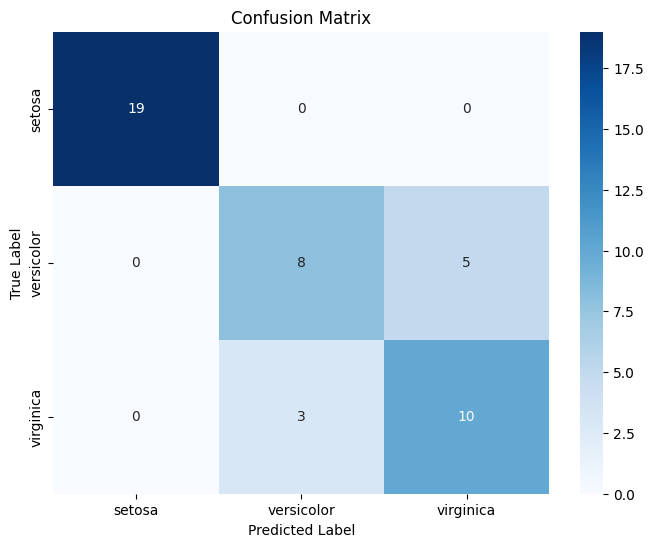

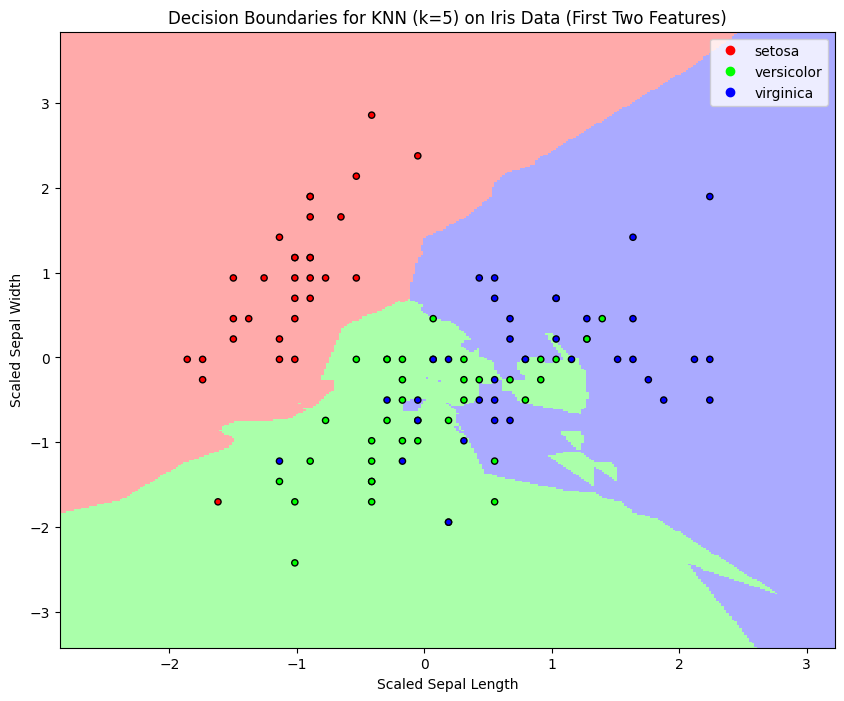

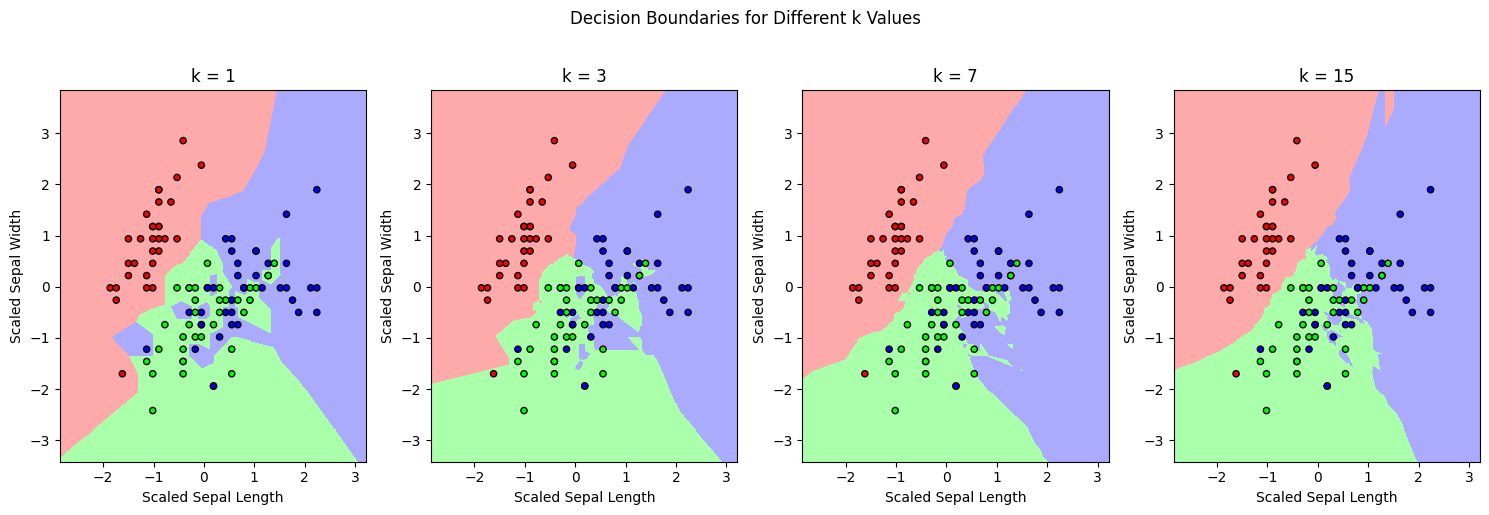

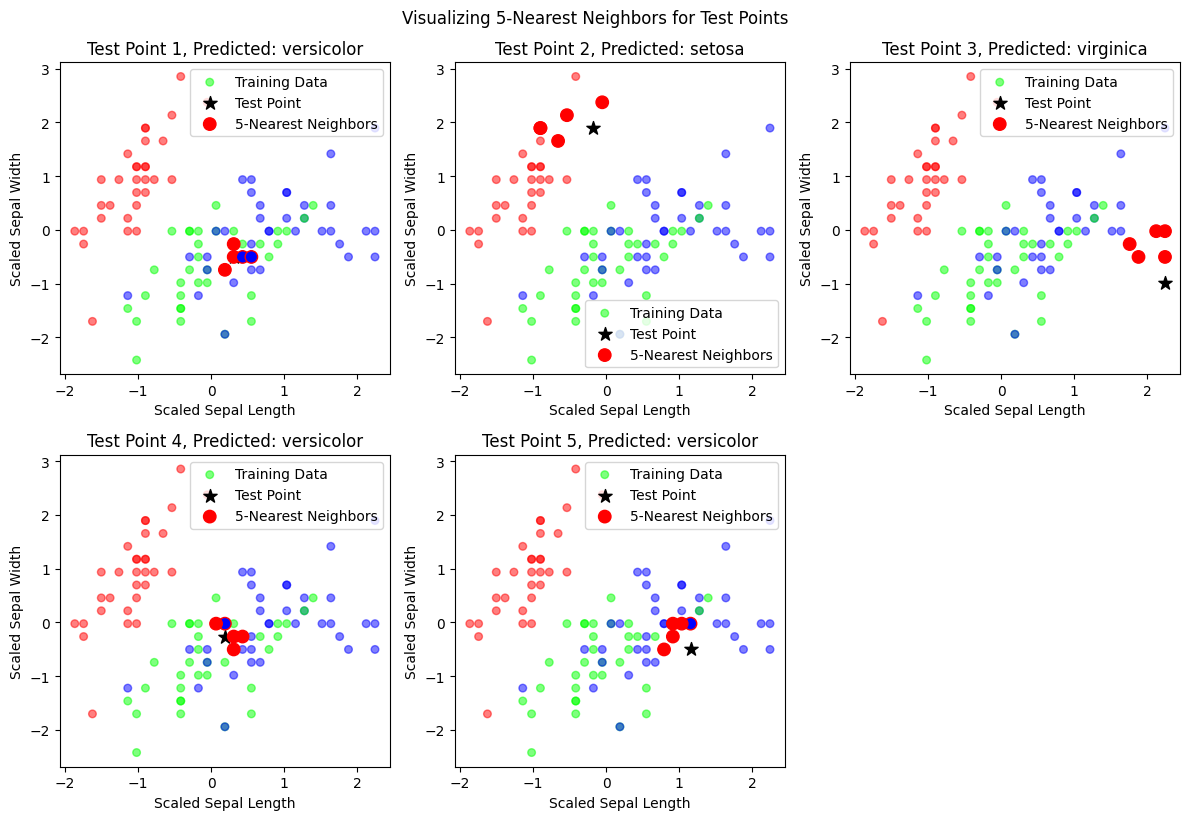

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for easy visualization
y = iris.target
class_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose the number of neighbors (k)
k = 5

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model (k={k}): {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualizing the decision boundaries (for k=5)
h = 0.02  # Step size in the meshgrid
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Decision Boundaries for KNN (k={k}) on Iris Data (First Two Features)")
plt.xlabel("Scaled Sepal Length")
plt.ylabel("Scaled Sepal Width")
plt.legend(handles=[plt.plot([], [], marker="o", ls="", color=cmap_bold(i),
                            label=class_names[i])[0] for i in range(len(class_names))])
plt.show()

# Visualizing the effect of different k values
k_values = [1, 3, 7, 15]
plt.figure(figsize=(15, 5))
for i, k_val in enumerate(k_values):
    knn_temp = KNeighborsClassifier(n_neighbors=k_val)
    knn_temp.fit(X_train_scaled, y_train)
    Z_temp = knn_temp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_temp = Z_temp.reshape(xx.shape)

    plt.subplot(1, len(k_values), i + 1)
    plt.pcolormesh(xx, yy, Z_temp, cmap=cmap_light)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title(f"k = {k_val}")
    plt.xlabel("Scaled Sepal Length")
    plt.ylabel("Scaled Sepal Width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.suptitle("Decision Boundaries for Different k Values", y=1.02)
plt.tight_layout()
plt.show()

# Visualizing the k-nearest neighbors for a few test points
num_test_visualize = 5
plt.figure(figsize=(12, 8))
for i in range(num_test_visualize):
    test_point = X_test_scaled[i].reshape(1, -1)
    distances, indices = knn.kneighbors(test_point, n_neighbors=k)
    nearest_neighbors_indices = indices[0]
    nearest_neighbors = X_train_scaled[nearest_neighbors_indices]
    nearest_neighbors_labels = y_train[nearest_neighbors_indices]
    predicted_label = knn.predict(test_point)[0]

    plt.subplot(2, 3, i + 1)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=cmap_bold, alpha=0.5, s=30, label='Training Data')
    plt.scatter(test_point[:, 0], test_point[:, 1], c='black', marker='*', s=100, label='Test Point')
    plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], c=nearest_neighbors_labels,
                cmap=cmap_bold, edgecolor='red', s=80, label=f'{k}-Nearest Neighbors')

    plt.title(f"Test Point {i+1}, Predicted: {class_names[predicted_label]}")
    plt.xlabel("Scaled Sepal Length")
    plt.ylabel("Scaled Sepal Width")
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Visualizing {k}-Nearest Neighbors for Test Points", y=1.02)
plt.show()